In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
df = pd.read_csv("menstruation.csv")
df

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0
1,4,18,25,17,10,6,yes,5 6,76.0,0,26.3,30,5.0
2,2,19,30,17,13,4,no,5 3,56.0,0,21.9,30,2.0
3,3,19,28,16,14,6,no,5 1,61.0,0,25.4,30,3.0
4,2,19,35,18,15,5,no,5'3,55.0,0,21.5,35,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2,19,35,16,12,5,no,5'3,57.0,0,22.3,30,1.0
158,2,18,30,13,14,6,no,5'6,64.0,0,22.5,30,2.0
159,3,19,40,16,14,6,no,5'3,55.2,0,21.6,38,3.0
160,2,18,32,15,14,8,no,5'6,45.5,0,16.2,32,4.0


# EDA


In [3]:
df.head(5)

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Height,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,no,5 6,76.0,0,26.3,30,4.0
1,4,18,25,17,10,6,yes,5 6,76.0,0,26.3,30,5.0
2,2,19,30,17,13,4,no,5 3,56.0,0,21.9,30,2.0
3,3,19,28,16,14,6,no,5 1,61.0,0,25.4,30,3.0
4,2,19,35,18,15,5,no,5'3,55.0,0,21.5,35,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_peak              162 non-null    int64  
 1   Age                         162 non-null    int64  
 2   Length_of_cycle             162 non-null    int64  
 3   Estimated_day_of_ovulution  162 non-null    int64  
 4   Length_of_Leutal_Phase      162 non-null    int64  
 5   Length_of_menses            162 non-null    int64  
 6   Unusual_Bleeding            162 non-null    object 
 7   Height                      162 non-null    object 
 8   Weight                      162 non-null    float64
 9   Income                      162 non-null    int64  
 10  BMI                         162 non-null    float64
 11  Mean_of_length_of_cycle     162 non-null    int64  
 12  Menses_score                162 non-null    float64
dtypes: float64(3), int64(8), object(2)


In [5]:
df.describe()

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Weight,Income,BMI,Mean_of_length_of_cycle,Menses_score
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0,162.000000,162.000000,162.000000
mean,2.518519,19.333333,29.283951,15.135802,12.753086,5.061728,56.696296,0.0,21.738889,29.320988,3.372840
std,0.706863,1.453204,4.191783,2.352496,3.270538,1.025703,9.471440,0.0,2.975396,5.319196,1.183112
min,1.000000,14.000000,22.000000,7.000000,7.000000,1.000000,40.000000,0.0,16.200000,13.000000,1.000000
25%,2.000000,19.000000,27.000000,14.000000,10.000000,5.000000,51.000000,0.0,20.400000,27.000000,3.000000
50%,2.000000,19.000000,28.000000,15.000000,13.000000,5.000000,55.000000,0.0,21.600000,30.000000,3.000000
75%,3.000000,20.000000,30.000000,16.000000,14.000000,6.000000,60.000000,0.0,22.500000,30.000000,4.000000
max,5.000000,25.000000,40.000000,22.000000,30.000000,8.000000,85.000000,0.0,32.900000,46.000000,5.000000


In [6]:
df.shape

(162, 13)

# DATA PREPROCESSING


In [7]:
df = df[["number_of_peak", "Age", "Length_of_cycle", "Estimated_day_of_ovulution", "Length_of_Leutal_Phase", "Length_of_menses", "Unusual_Bleeding", "Weight", "BMI", "Mean_of_length_of_cycle", "Menses_score"]]
df

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Weight,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,no,76.0,26.3,30,4.0
1,4,18,25,17,10,6,yes,76.0,26.3,30,5.0
2,2,19,30,17,13,4,no,56.0,21.9,30,2.0
3,3,19,28,16,14,6,no,61.0,25.4,30,3.0
4,2,19,35,18,15,5,no,55.0,21.5,35,5.0
...,...,...,...,...,...,...,...,...,...,...,...
157,2,19,35,16,12,5,no,57.0,22.3,30,1.0
158,2,18,30,13,14,6,no,64.0,22.5,30,2.0
159,3,19,40,16,14,6,no,55.2,21.6,38,3.0
160,2,18,32,15,14,8,no,45.5,16.2,32,4.0


In [8]:
df['Unusual_Bleeding'] = df['Unusual_Bleeding'].replace(['No', 'NO'], 'no', regex=True)
df['Unusual_Bleeding'] = df['Unusual_Bleeding'].map({'no':0, 'yes':1})
df["Menses_score"]=df["Menses_score"].astype(str).map({"1.0":0, "2.0":1, "3.0":2, "4.0":3, "4.2":4, "4.5":5, "5.0":6})

C:\Users\laure\AppData\Local\Temp\ipykernel_15348\2311115339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unusual_Bleeding'] = df['Unusual_Bleeding'].replace(['No', 'NO'], 'no', regex=True)
C:\Users\laure\AppData\Local\Temp\ipykernel_15348\2311115339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unusual_Bleeding'] = df['Unusual_Bleeding'].map({'no':0, 'yes':1})
C:\Users\laure\AppData\Local\Temp\ipykernel_15348\2311115339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [9]:
df = df.dropna()
df

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Weight,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,0,76.0,26.3,30,3
1,4,18,25,17,10,6,1,76.0,26.3,30,6
2,2,19,30,17,13,4,0,56.0,21.9,30,1
3,3,19,28,16,14,6,0,61.0,25.4,30,2
4,2,19,35,18,15,5,0,55.0,21.5,35,6
...,...,...,...,...,...,...,...,...,...,...,...
157,2,19,35,16,12,5,0,57.0,22.3,30,0
158,2,18,30,13,14,6,0,64.0,22.5,30,1
159,3,19,40,16,14,6,0,55.2,21.6,38,2
160,2,18,32,15,14,8,0,45.5,16.2,32,3


In [10]:
df.isnull().sum()
df

,number_of_peak,Age,Length_of_cycle,Estimated_day_of_ovulution,Length_of_Leutal_Phase,Length_of_menses,Unusual_Bleeding,Weight,BMI,Mean_of_length_of_cycle,Menses_score
0,3,18,27,14,9,5,0,76.0,26.3,30,3
1,4,18,25,17,10,6,1,76.0,26.3,30,6
2,2,19,30,17,13,4,0,56.0,21.9,30,1
3,3,19,28,16,14,6,0,61.0,25.4,30,2
4,2,19,35,18,15,5,0,55.0,21.5,35,6
...,...,...,...,...,...,...,...,...,...,...,...
157,2,19,35,16,12,5,0,57.0,22.3,30,0
158,2,18,30,13,14,6,0,64.0,22.5,30,1
159,3,19,40,16,14,6,0,55.2,21.6,38,2
160,2,18,32,15,14,8,0,45.5,16.2,32,3


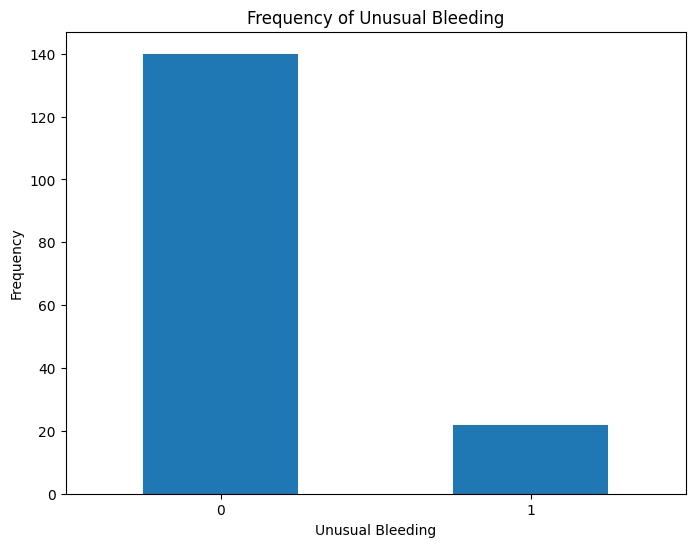

In [11]:
plt.figure(figsize=(8, 6))
df['Unusual_Bleeding'].value_counts().plot(kind='bar')
plt.title('Frequency of Unusual Bleeding')
plt.xlabel('Unusual Bleeding')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.show()

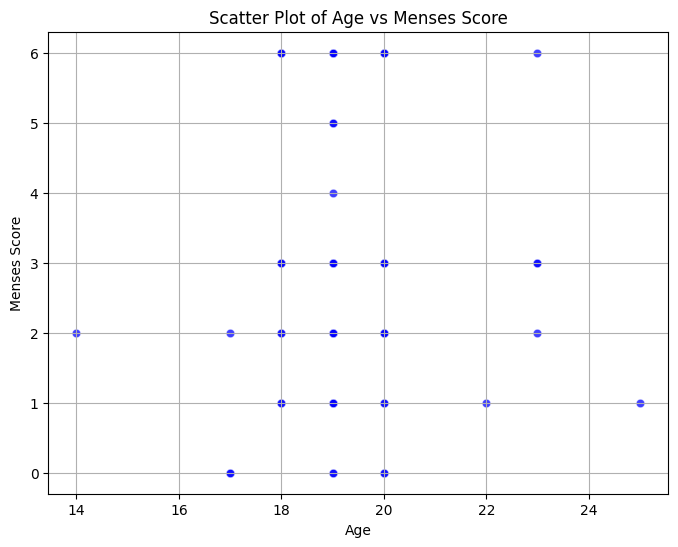

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Menses_score', color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs Menses Score')
plt.xlabel('Age')
plt.ylabel('Menses Score')
plt.grid(True)
plt.show()

# Find out Age range in the Dataframe

In [13]:
frequency_counts = df['Age'].value_counts()
frequency_counts

Age
19    76
20    46
18    20
23     8
17     6
22     2
14     2
25     2
Name: count, dtype: int64

# KNN, CLASSIFICATION


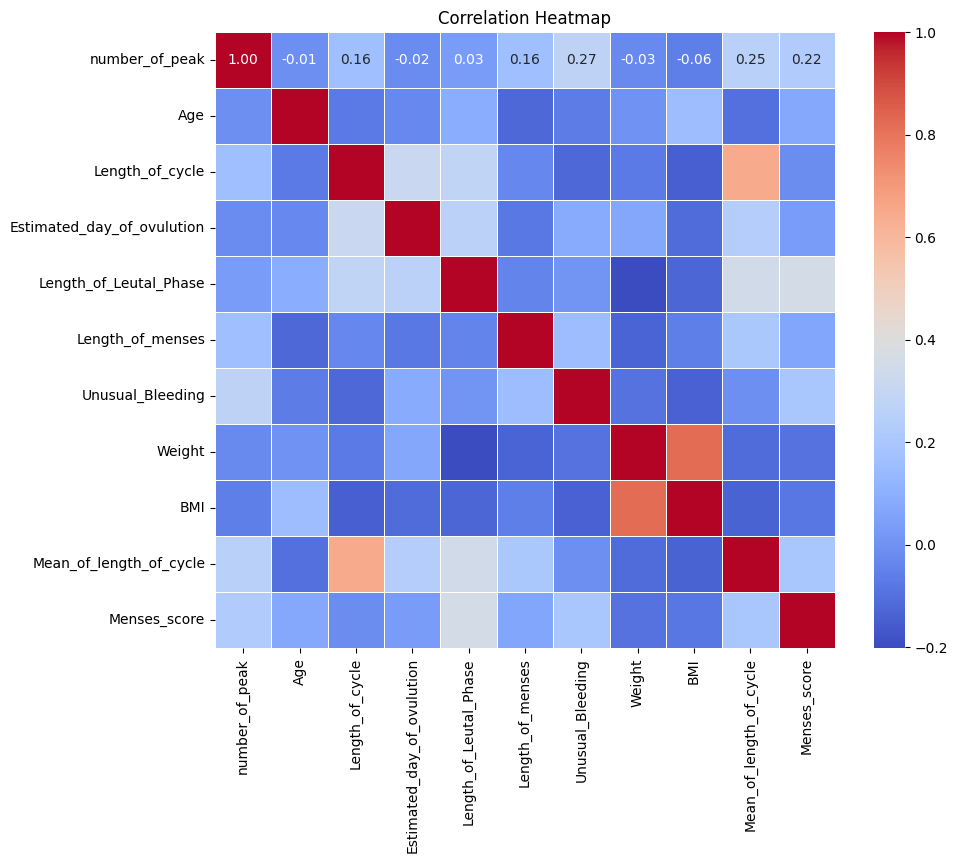

In [14]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Accuracy: 0.9696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.50      0.67         2

    accuracy                           0.97        33
   macro avg       0.98      0.75      0.83        33
weighted avg       0.97      0.97      0.96        33



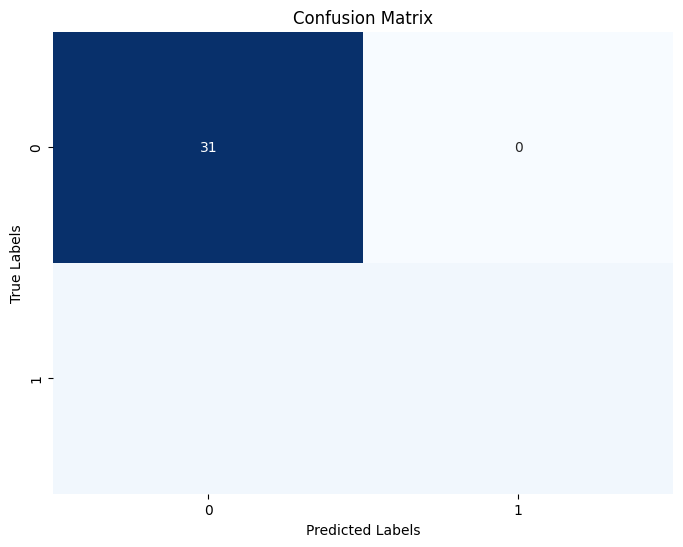

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame which should be defined beforehand
# df = pd.read_csv('your_data.csv') # Example of how you might load your data

# Select features and target
X = df[['number_of_peak', 'Length_of_cycle']]
y = df['Unusual_Bleeding']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


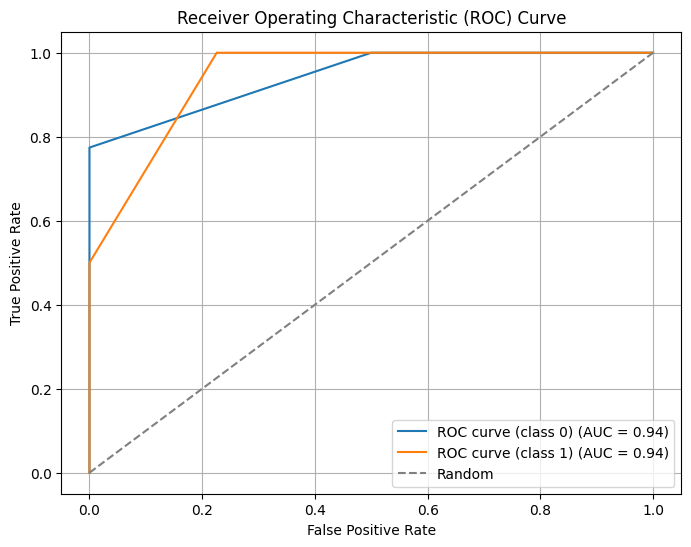

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Fit the KNN classifier on the training data
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Get predicted probabilities for each class
y_probs = knn_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(set(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(set(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("Model is overfitting")
else:
    print("Model is not overfitting.")

Training Accuracy: 0.9302325581395349
Test Accuracy: 0.9696969696969697
Model is not overfitting.


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [9]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

test_accuracy = best_knn.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.84615385 0.84615385 0.84615385 0.84615385 0.84      ]
Mean CV Accuracy: 0.844923076923077
Test Accuracy: 0.9696969696969697


In [35]:
X = df[['number_of_peak', 'Length_of_cycle']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9696969696969697

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.50      0.67         2

    accuracy                           0.97        33
   macro avg       0.98      0.75      0.83        33
weighted avg       0.97      0.97      0.96        33



In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Initialize the GridSearchCV with KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with best estimator
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best KNN Accuracy:", accuracy_best)

# Print classification report
print("\nBest KNN Classification Report:")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'n_neighbors': 5}
Best Score: 0.8603076923076923
Best KNN Accuracy: 0.9393939393939394

Best KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.00      0.00      0.00         2

    accuracy                           0.94        33
   macro avg       0.47      0.50      0.48        33
weighted avg       0.88      0.94      0.91        33



D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


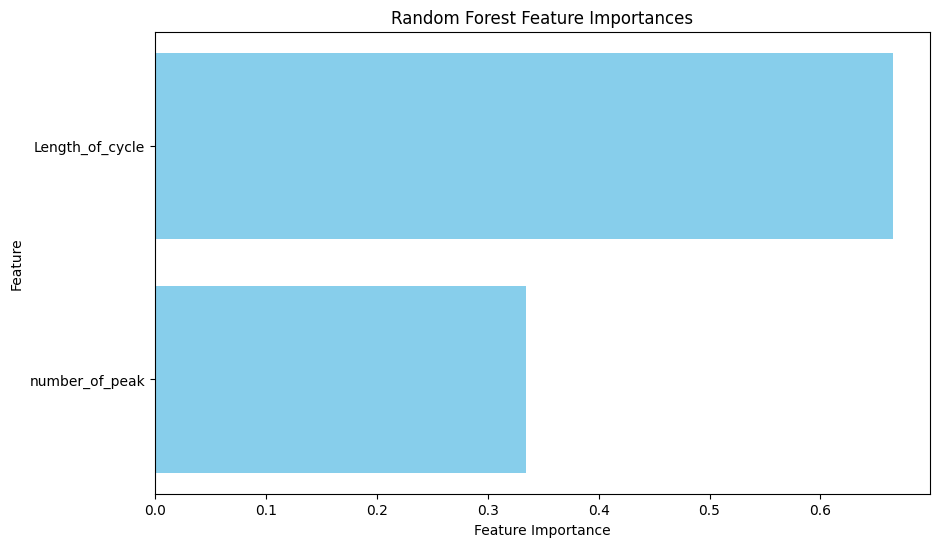

In [38]:
feature_importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Age', 'Length_of_cycle', 'Estimated_day_of_ovulution', 'Length_of_Leutal_Phase', 'Length_of_menses', 'Weight', 'BMI', 'Mean_of_length_of_cycle', 'Menses_score']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8181818181818182

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.00      0.00      0.00         2

    accuracy                           0.82        33
   macro avg       0.47      0.44      0.45        33
weighted avg       0.87      0.82      0.85        33



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Age']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7878787878787878

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.00      0.00      0.00         2

    accuracy                           0.79        33
   macro avg       0.46      0.42      0.44        33
weighted avg       0.87      0.79      0.83        33



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Length_of_cycle']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9696969696969697

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.50      0.67         2

    accuracy                           0.97        33
   macro avg       0.98      0.75      0.83        33
weighted avg       0.97      0.97      0.96        33



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Estimated_day_of_ovulution']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.00      0.00      0.00         2

    accuracy                           0.91        33
   macro avg       0.47      0.48      0.48        33
weighted avg       0.88      0.91      0.89        33



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Length_of_Leutal_Phase']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.00      0.00      0.00         2

    accuracy                           0.91        33
   macro avg       0.47      0.48      0.48        33
weighted avg       0.88      0.91      0.89        33



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Length_of_menses']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9393939393939394

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.00      0.00      0.00         2

    accuracy                           0.94        33
   macro avg       0.47      0.50      0.48        33
weighted avg       0.88      0.94      0.91        33



D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Weight']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.00      0.00      0.00         2

    accuracy                           0.91        33
   macro avg       0.47      0.48      0.48        33
weighted avg       0.88      0.91      0.89        33



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'BMI']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8787878787878788

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.25      0.50      0.33         2

    accuracy                           0.88        33
   macro avg       0.61      0.70      0.63        33
weighted avg       0.92      0.88      0.90        33



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Mean_of_length_of_cycle']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9393939393939394

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.00      0.00      0.00         2

    accuracy                           0.94        33
   macro avg       0.47      0.50      0.48        33
weighted avg       0.88      0.94      0.91        33



D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['number_of_peak', 'Menses_score']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6363636363636364

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        31
           1       0.14      1.00      0.25         2

    accuracy                           0.64        33
   macro avg       0.57      0.81      0.51        33
weighted avg       0.95      0.64      0.73        33



In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['Age','Menses_score']]
y = df['Unusual_Bleeding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8787878787878788

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.00      0.00      0.00         2

    accuracy                           0.88        33
   macro avg       0.47      0.47      0.47        33
weighted avg       0.88      0.88      0.88        33



In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9393939393939394

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.00      0.00      0.00         2

    accuracy                           0.94        33
   macro avg       0.47      0.50      0.48        33
weighted avg       0.88      0.94      0.91        33



D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\ApplicationFiles\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
